In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import pickle
import pandas as pd

def get_quantile(samples,q,dim=1):
    return torch.quantile(samples,q,dim=dim).cpu().numpy()

# Visualize Traj Forecasting Results

In [2]:
dataset = 'trajectory' # choose 'healthcare' or 'airquality'
datafolder = 'traj_forecasting_20240731_121105' # set the folder name
nsample = 5 # number of generated sample

segment_id = 104 # target segment to visualize
path = './save/'+datafolder+'/segment' + str(segment_id) + '_generated_outputs_nsample' + str(nsample) + '.pk'
# path = './save/'+datafolder+'/generated_outputs_nsample' + str(nsample) + '.pk'

with open(path, 'rb') as f:
    samples,all_target,all_evalpoint,all_observed,all_observed_time,scaler,mean_scaler = pickle.load(f)

all_target_np = all_target.cpu().numpy()
all_evalpoint_np = all_evalpoint.cpu().numpy()
all_observed_np = all_observed.cpu().numpy()
all_given_np = all_observed_np - all_evalpoint_np

K = samples.shape[-1] #feature
L = samples.shape[-2] #time length


qlist =[0.05,0.25,0.5,0.75,0.95]
quantiles_imp= []
for q in qlist:
    quantiles_imp.append(get_quantile(samples, q, dim=1)*(1-all_given_np) + all_target_np * all_given_np)



result_path = './save/'+datafolder+'/result_nsample' + str(nsample) + '.pk'
with open(result_path, 'rb') as f:
    RMSE, MAE, _ = pickle.load(f) # the last metric is reserved

In [3]:
print(samples.shape)
print(quantiles_imp[2][0,:,1])

torch.Size([15, 5, 50, 3])
[2.823703  1.9649621 2.9937901 1.9538568 1.9473438 1.9401219 1.9321485
 3.0325906 2.9318123 1.9033064 1.891979  2.9069424 2.7902925 1.8539162
 2.7549093 1.8255506 2.8383322 1.7950466 2.9090433 1.7625225 1.7453868
 2.7337704 2.9424388 3.12687   3.081587  2.9384475 1.6311928 2.486155
 2.4144714 2.80652   1.5489408 1.5282842 2.6911967 1.4873427 1.4672335
 1.4475262 2.7927315 2.7533197 2.8542814 2.8222    2.8511486 2.8430793
 2.787066  3.1323252 2.8203073 3.0248823 2.7856834 2.8930476 2.7771244
 2.7635393]


In [4]:
print(f"RMSE = {RMSE}")
print(f"MAE = {MAE}")

RMSE = 87.72319602403158
MAE = 19.063848295381874


In [6]:
print(all_target_np.shape)
print(all_evalpoint_np.shape)
print(all_given_np.shape)

(15, 50, 3)
(15, 50, 3)
(15, 50, 3)


In [7]:
def visualize_trajectory(dataind, nrows=2, ncols=3):
    plt.rcParams["font.size"] = 16
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols,figsize=(18.0, 6.0))
    fig.delaxes(axes[-1][-1])

    for k in range(K):
        df = pd.DataFrame({"x":np.arange(0,L), "val":all_target_np[dataind,:,k], "y":all_evalpoint_np[dataind,:,k]})
        df = df[df.y != 0]
        df2 = pd.DataFrame({"x":np.arange(0,L), "val":all_target_np[dataind,:,k], "y":all_given_np[dataind,:,k]})
        df2 = df2[df2.y != 0]
        row = k // ncols
        col = k % ncols
        axes[row][col].plot(range(0,L), quantiles_imp[2][dataind,:,k], color = 'g',linestyle='solid',label='CSDI')
        # axes[row][col].fill_between(range(0,L), quantiles_imp[1][dataind,:,k],quantiles_imp[3][dataind,:,k],
        #                 color='g', alpha=0.3) # 1Q and 3Q
        axes[row][col].plot(df.x,df.val, color = 'b',marker = 'o', linestyle='None')
        axes[row][col].plot(df2.x,df2.val, color = 'r',marker = 'x', linestyle='None')
        plt.setp(axes[row,col], xlabel='time in 0.1s')
        if col == 0:
            plt.setp(axes[row,col], ylabel='position')
        elif col == 1:
            plt.setp(axes[row,col], ylabel='speed')
        elif col == 2:
            plt.setp(axes[row,col], ylabel='acceleration')
        axes[row,col].spines[['right', 'top']].set_visible(False)

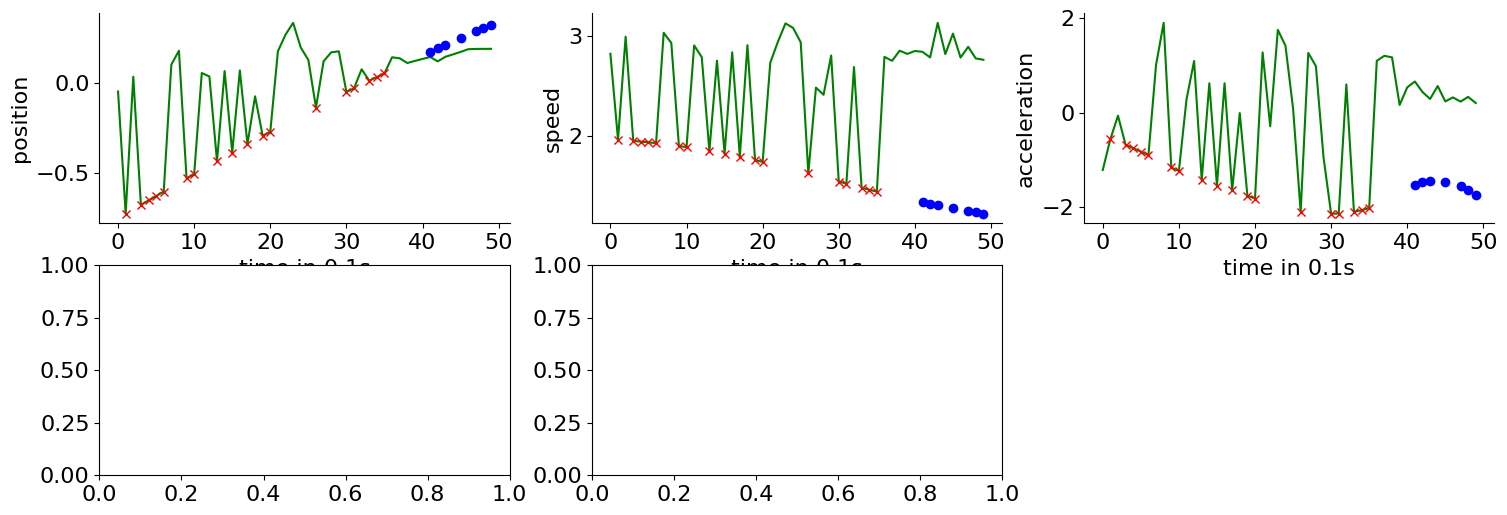

In [8]:
visualize_trajectory(dataind=0) # change to visualize a different sample

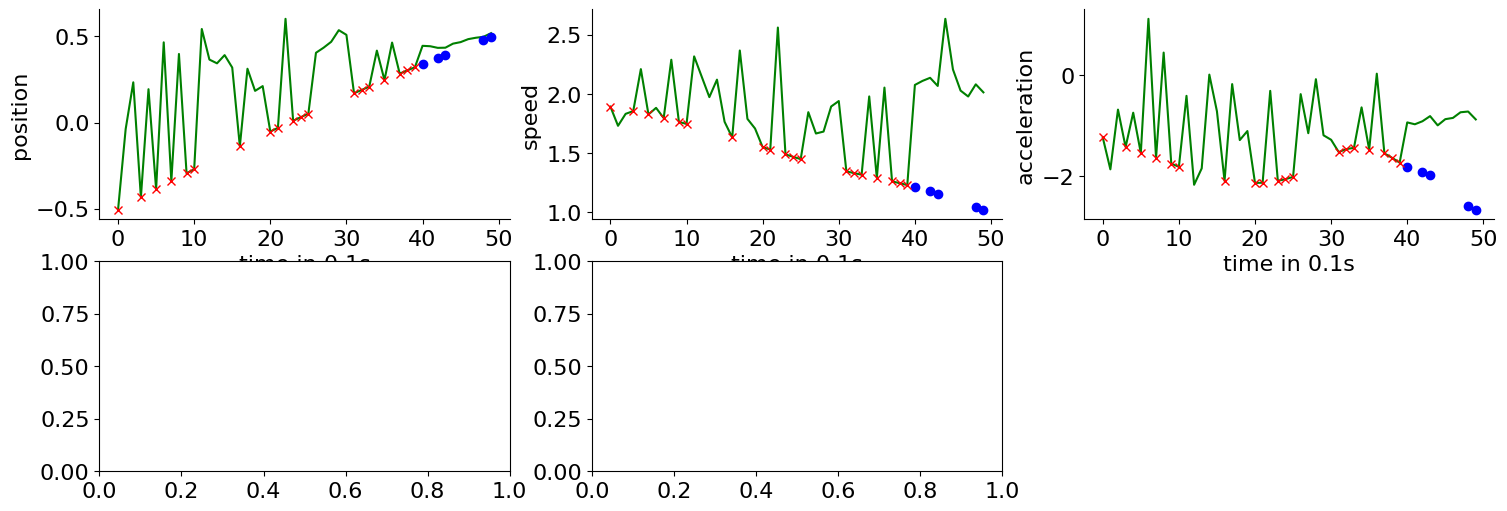

In [9]:
visualize_trajectory(dataind=1) # change to visualize a different sample

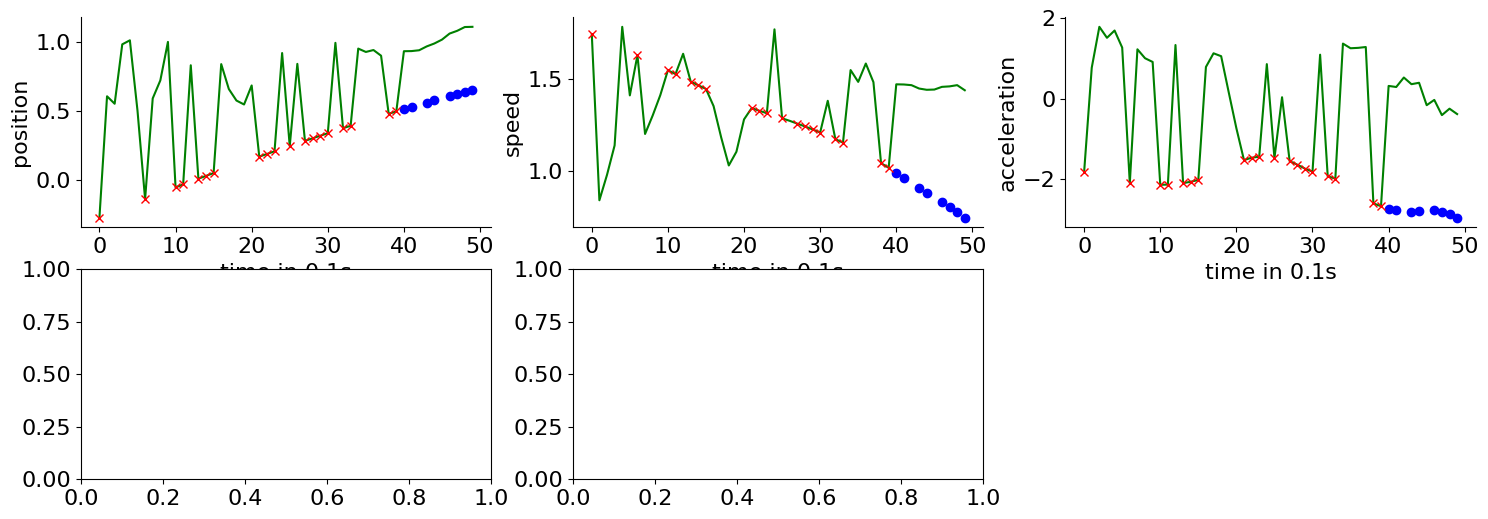

In [10]:
visualize_trajectory(dataind=2) # change to visualize a different sample

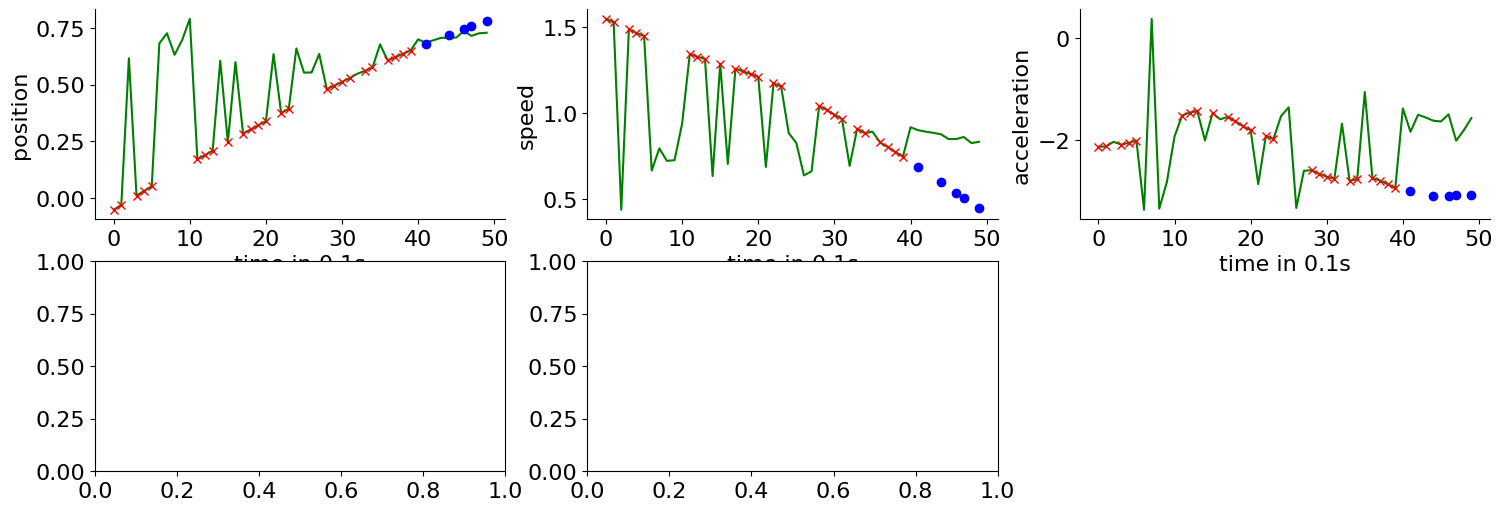

In [11]:
visualize_trajectory(dataind=3) # change to visualize a different sample

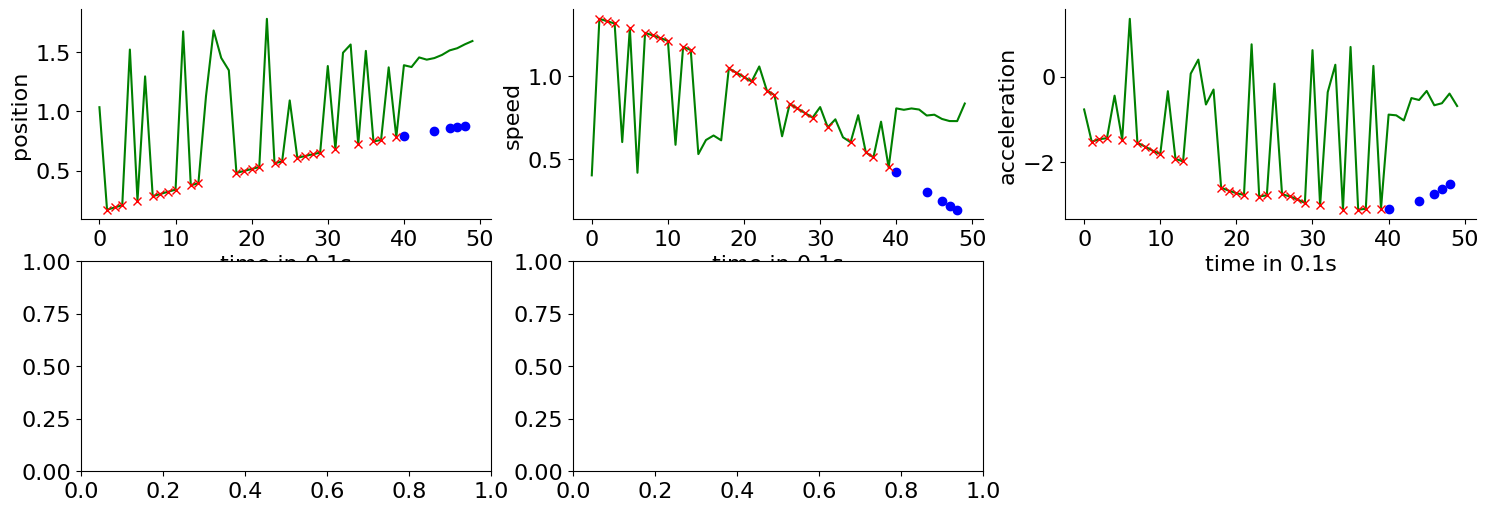

In [12]:
visualize_trajectory(dataind=4) # change to visualize a different sample

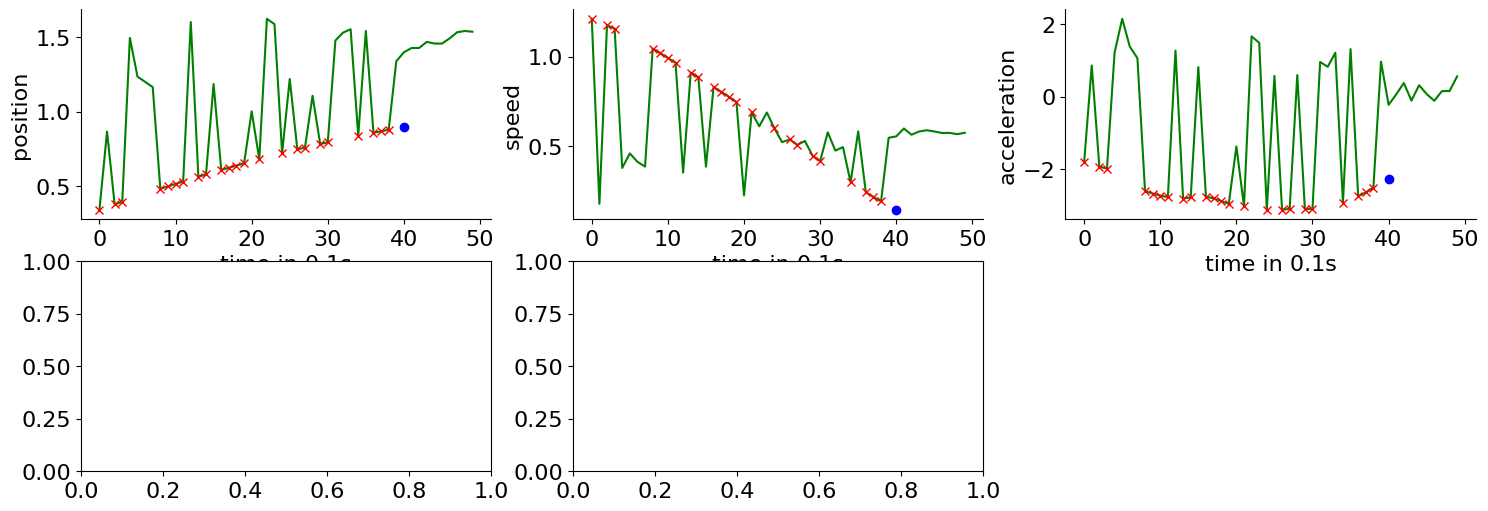

In [13]:
visualize_trajectory(dataind=5) # change to visualize a different sample

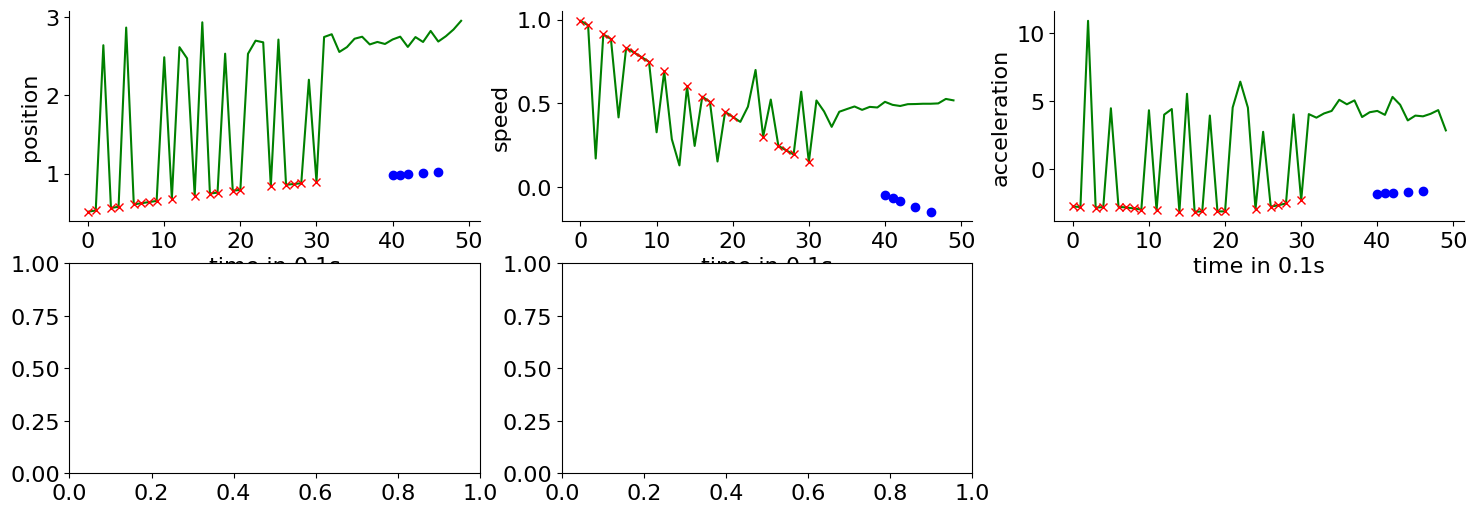

In [14]:
visualize_trajectory(dataind=6) # change to visualize a different sample

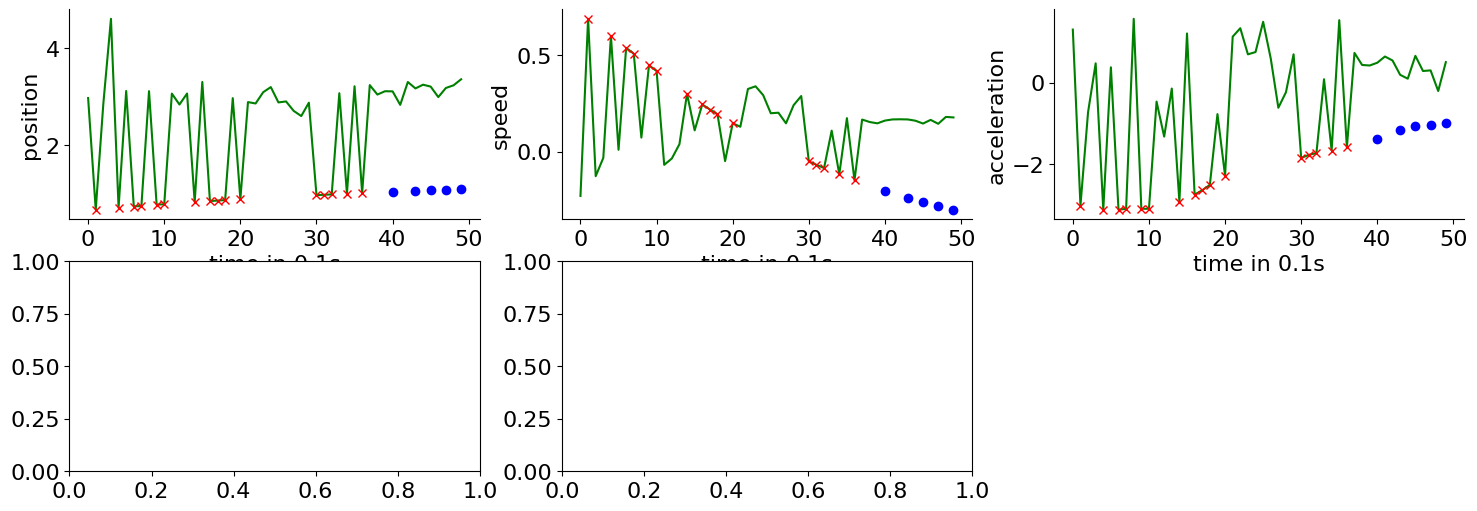

In [15]:
visualize_trajectory(dataind=7) # change to visualize a different sample

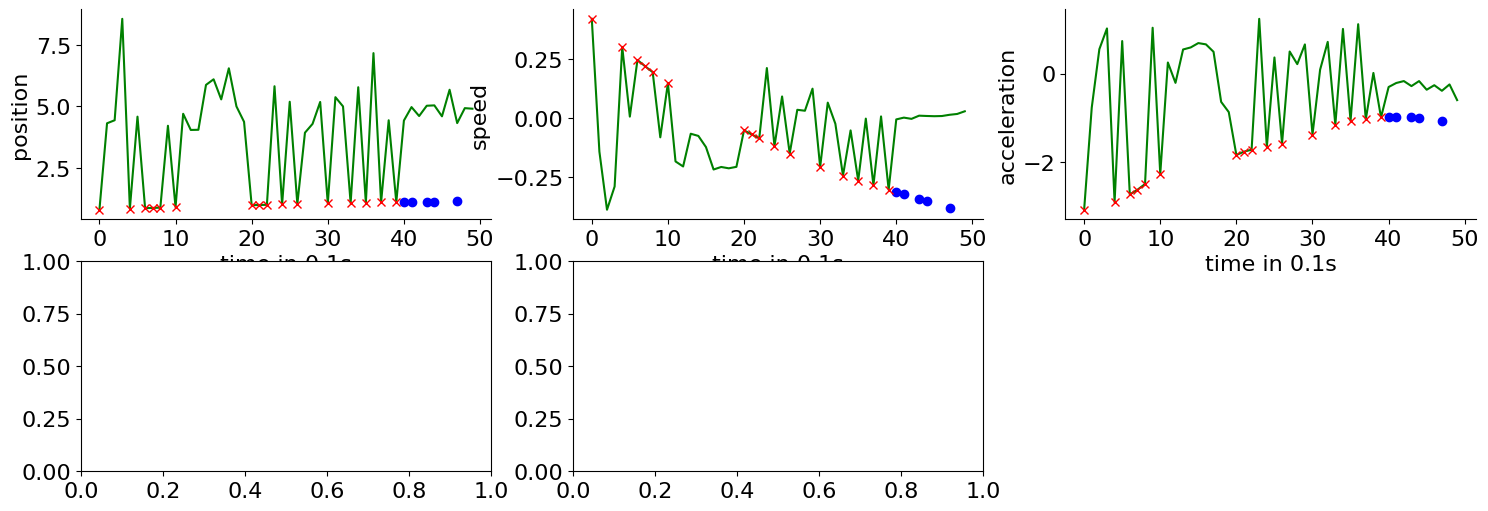

In [16]:
visualize_trajectory(dataind=8) # change to visualize a different sample

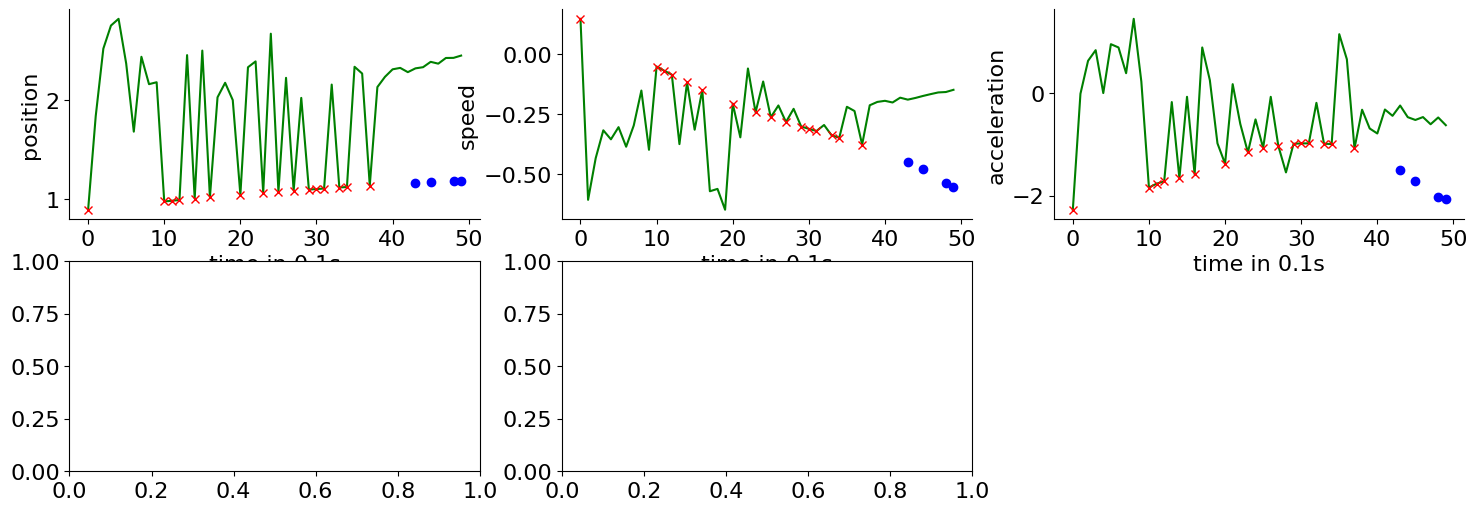

In [17]:
visualize_trajectory(dataind=9) # change to visualize a different sample

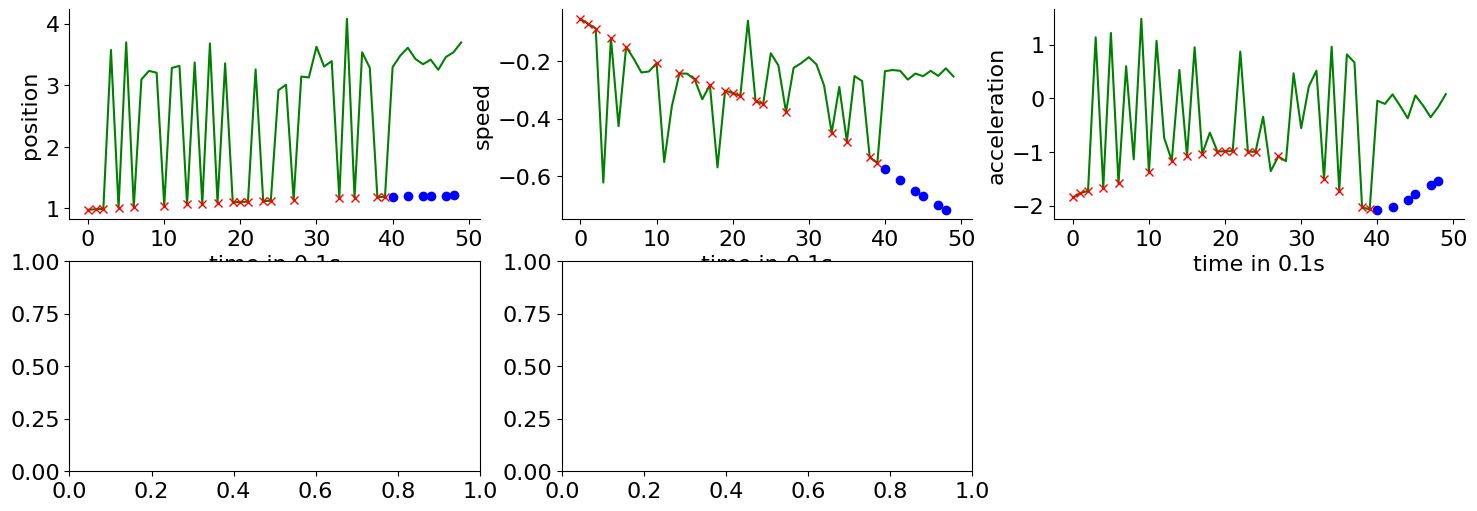

In [18]:
visualize_trajectory(dataind=10) # change to visualize a different sample

# Visualize Traj Imputation Results

In [ ]:
dataset = 'trajectory' # choose 'healthcare' or 'airquality'
datafolder = 'traj_imputation_20240217_151030' # set the folder name
nsample = 5 # number of generated sample

segment_id = 3 # target segment to visualize
path = './save/'+datafolder+'/segment' + str(segment_id) + '_generated_outputs_nsample' + str(nsample) + '.pk'
# path = './save/'+datafolder+'/generated_outputs_nsample' + str(nsample) + '.pk'

with open(path, 'rb') as f:
    samples,all_target,all_evalpoint,all_observed,all_observed_time,scaler,mean_scaler = pickle.load(f)

all_target_np = all_target.cpu().numpy()
all_evalpoint_np = all_evalpoint.cpu().numpy()
all_observed_np = all_observed.cpu().numpy()
all_given_np = all_observed_np - all_evalpoint_np

K = samples.shape[-1] #feature
L = samples.shape[-2] #time length


qlist =[0.05,0.25,0.5,0.75,0.95]
quantiles_imp= []
for q in qlist:
    quantiles_imp.append(get_quantile(samples, q, dim=1)*(1-all_given_np) + all_target_np * all_given_np)



result_path = './save/'+datafolder+'/result_nsample' + str(nsample) + '.pk'
with open(result_path, 'rb') as f:
    RMSE, MAE, _ = pickle.load(f) # the last metric is reserved

In [ ]:
print(samples.shape)
print(quantiles_imp[2][0,:,1])

torch.Size([19, 5, 10, 3])
[0.1298409  0.12984791 0.12983958 0.12983954 0.12983878 0.12983547
 0.12985533 0.12987074 0.12985031 0.1298142 ]


In [ ]:
print(f"RMSE = {RMSE}")
print(f"MAE = {MAE}")

RMSE = 104.24134156689786
MAE = 85.89873046875


In [ ]:
all_target_np.shape

(19, 10, 3)

In [ ]:
def visualize_trajectory(dataind, nrows=2, ncols=3):
    plt.rcParams["font.size"] = 16
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols,figsize=(18.0, 6.0))
    fig.delaxes(axes[-1][-1])

    for k in range(K):
        df = pd.DataFrame({"x":np.arange(0,L), "val":all_target_np[dataind,:,k], "y":all_evalpoint_np[dataind,:,k]})
        df = df[df.y != 0]
        df2 = pd.DataFrame({"x":np.arange(0,L), "val":all_target_np[dataind,:,k], "y":all_given_np[dataind,:,k]})
        df2 = df2[df2.y != 0]
        row = k // ncols
        col = k % ncols
        axes[row][col].plot(range(0,L), quantiles_imp[2][dataind,:,k], color = 'g',linestyle='solid',label='CSDI')
        axes[row][col].fill_between(range(0,L), quantiles_imp[1][dataind,:,k],quantiles_imp[3][dataind,:,k],
                        color='g', alpha=0.3) # 1Q and 3Q
        axes[row][col].plot(df.x,df.val, color = 'b',marker = 'o', linestyle='None')
        axes[row][col].plot(df2.x,df2.val, color = 'r',marker = 'x', linestyle='None')
        plt.setp(axes[row,col], xlabel='time in 0.1s')
        if col == 0:
            plt.setp(axes[row,col], ylabel='position')
        elif col == 1:
            plt.setp(axes[row,col], ylabel='speed')
        elif col == 2:
            plt.setp(axes[row,col], ylabel='acceleration')
        axes[row,col].spines[['right', 'top']].set_visible(False)

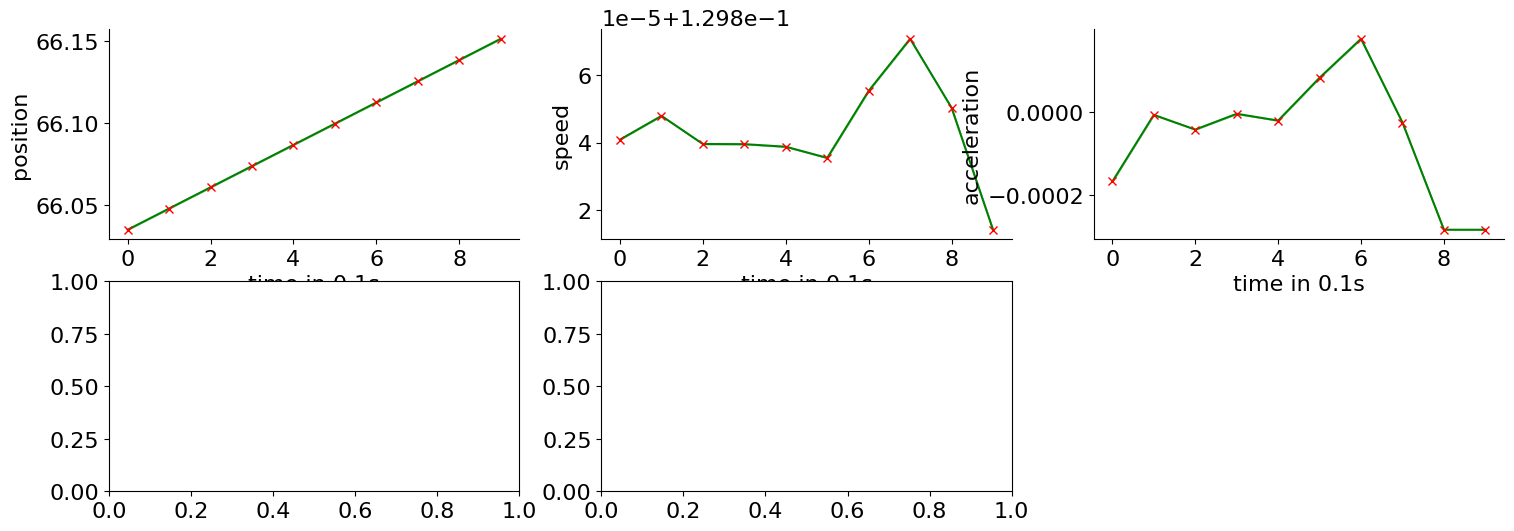

In [ ]:
visualize_trajectory(dataind=0) # change to visualize a different sample

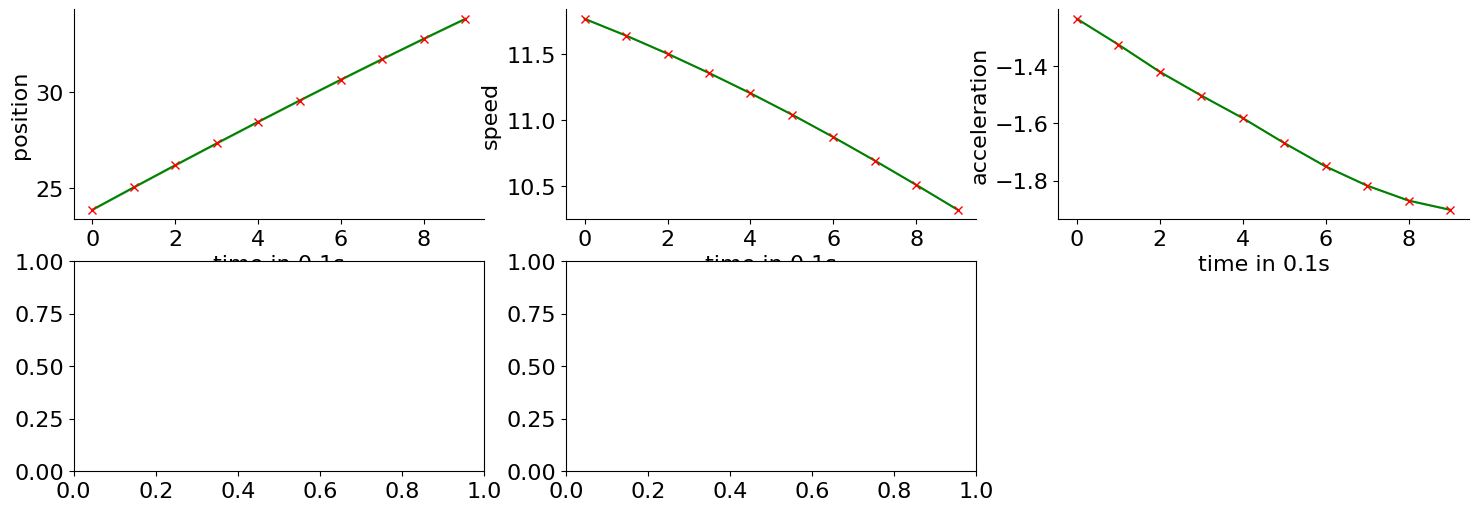

In [ ]:
visualize_trajectory(dataind=1) # change to visualize a different sample

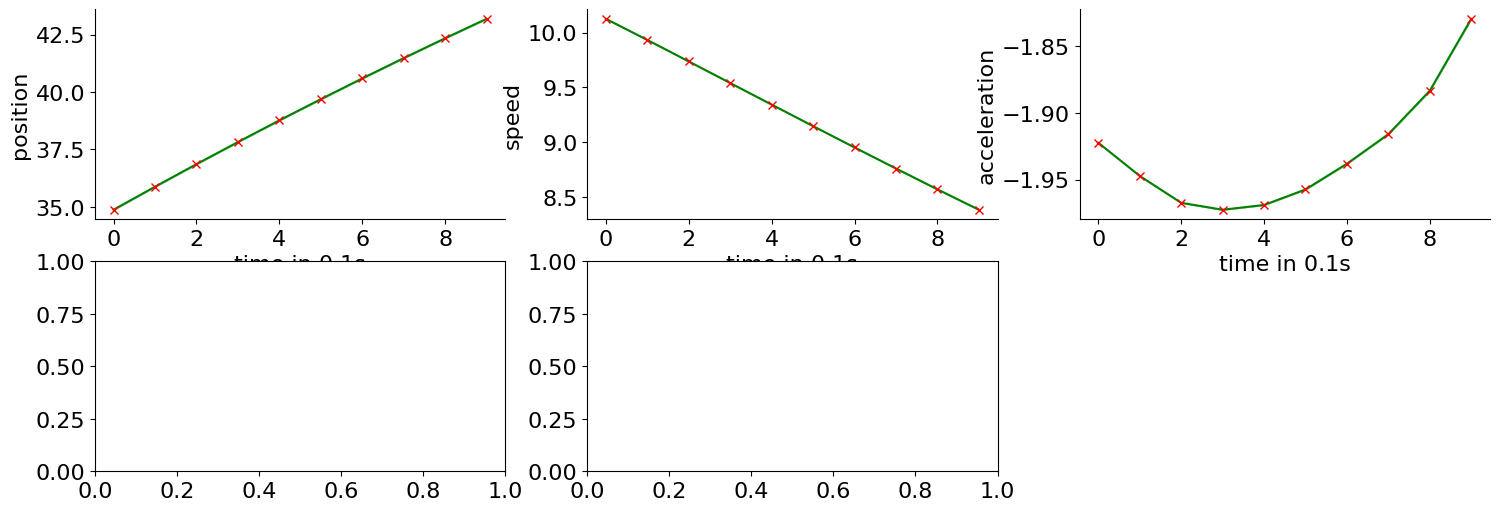

In [ ]:
visualize_trajectory(dataind=2) # change to visualize a different sample

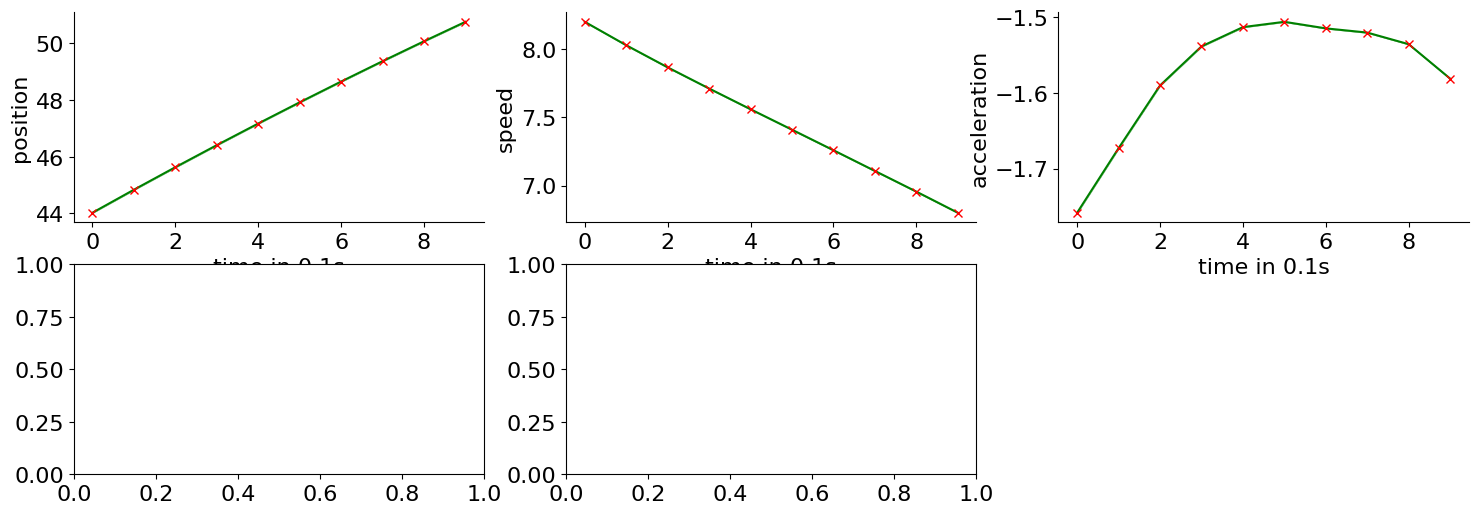

In [ ]:
visualize_trajectory(dataind=3) # change to visualize a different sample

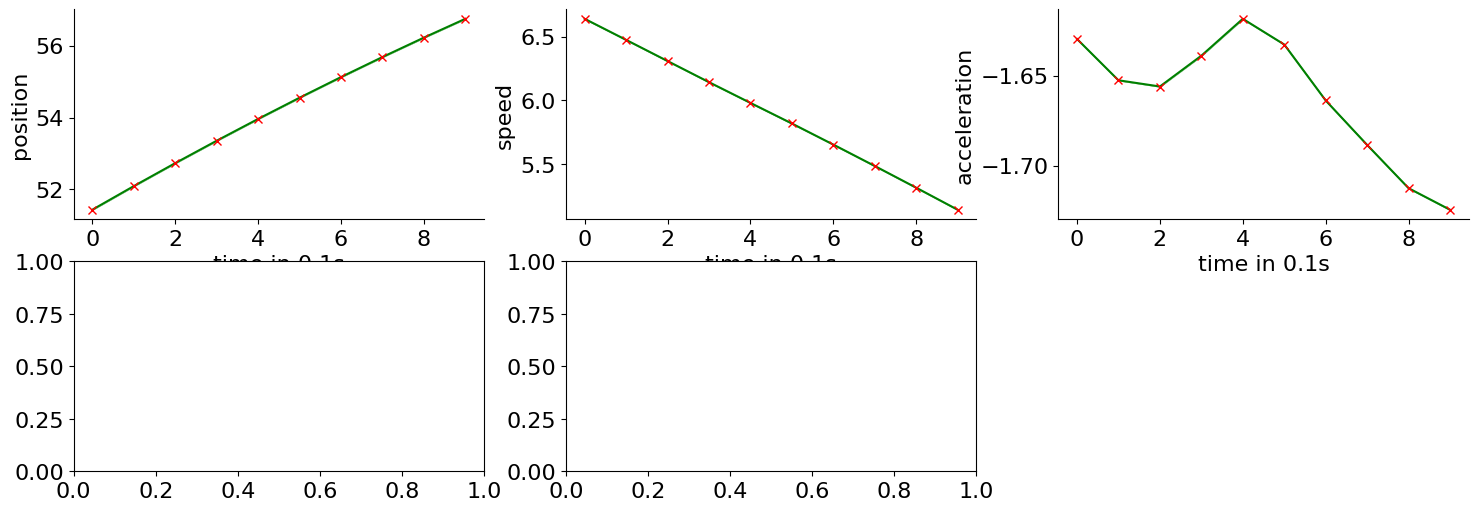

In [ ]:
visualize_trajectory(dataind=4) # change to visualize a different sample

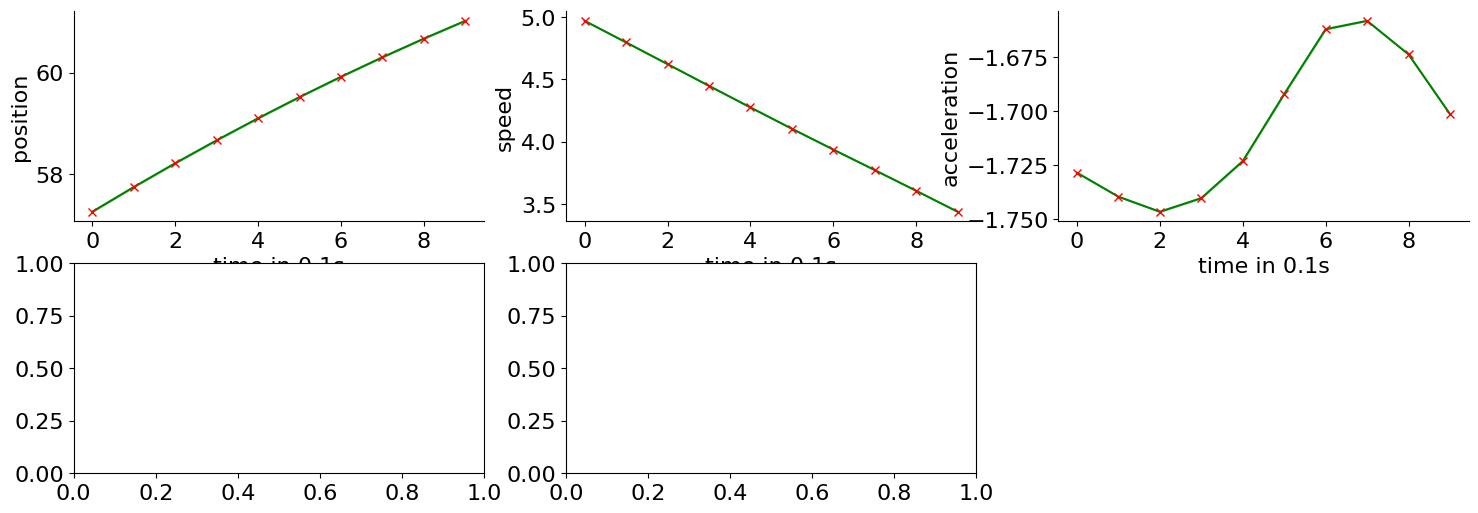

In [ ]:
visualize_trajectory(dataind=5) # change to visualize a different sample

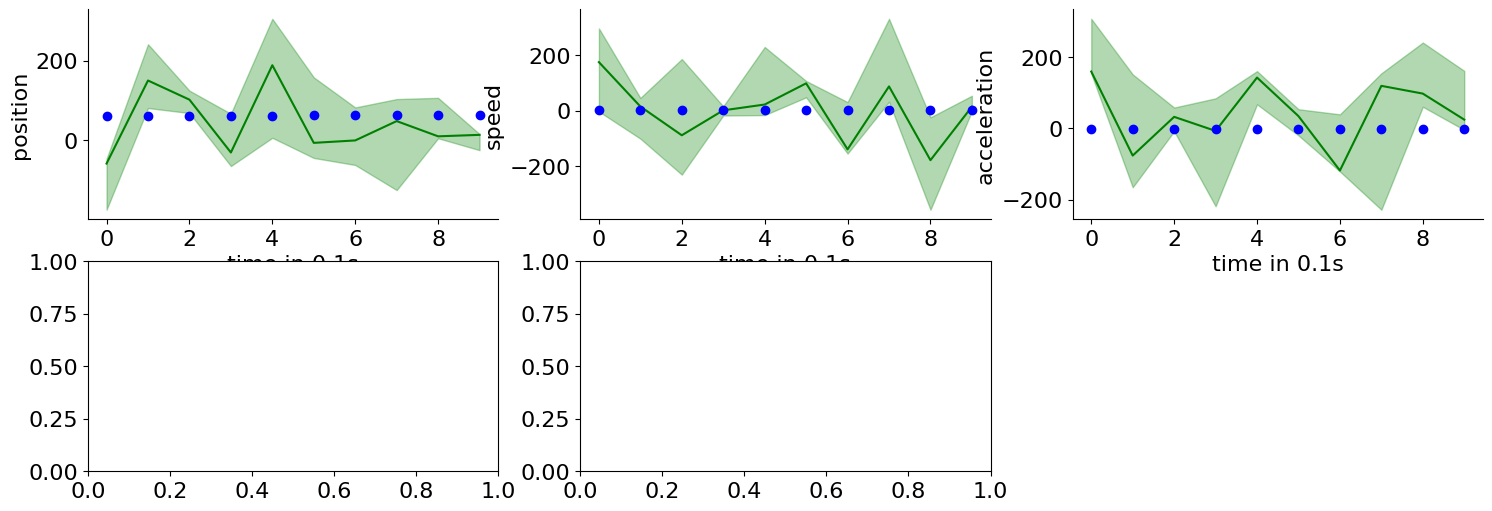

In [ ]:
visualize_trajectory(dataind=6) # change to visualize a different sample

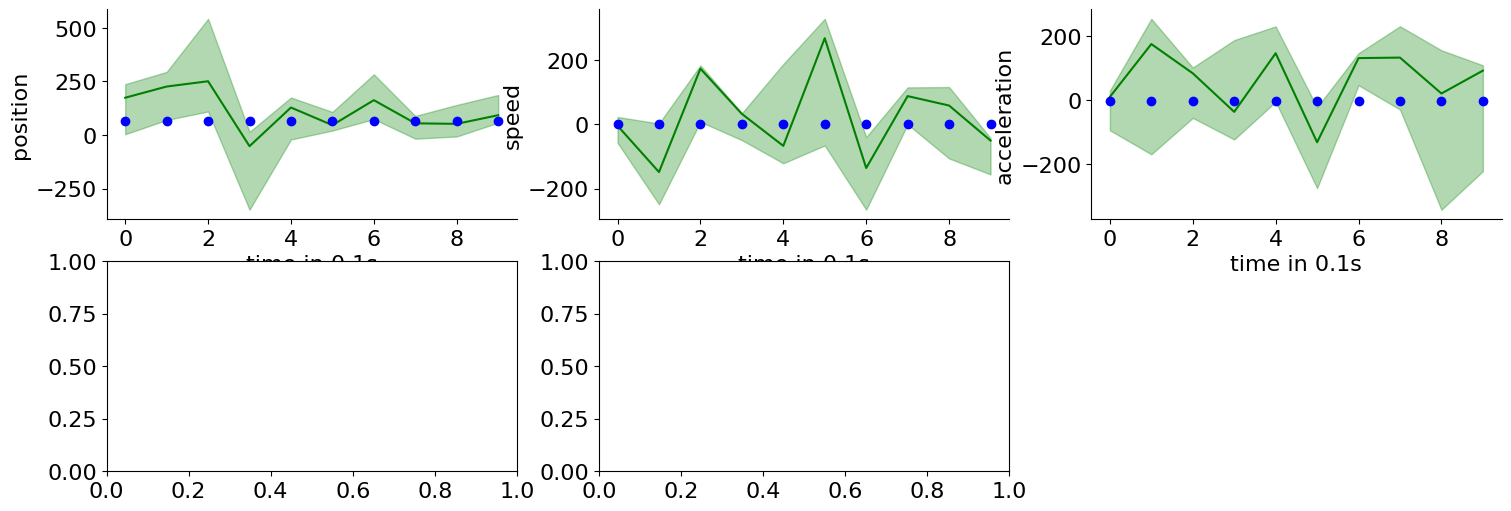

In [ ]:
visualize_trajectory(dataind=7) # change to visualize a different sample

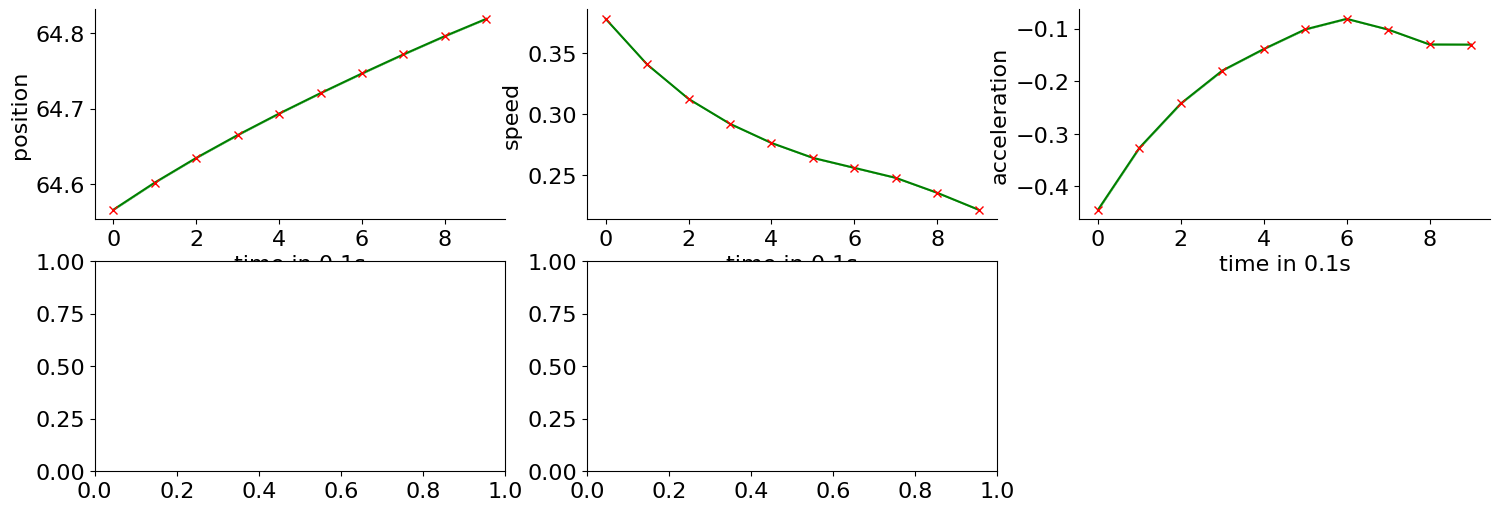

In [ ]:
visualize_trajectory(dataind=8) # change to visualize a different sample

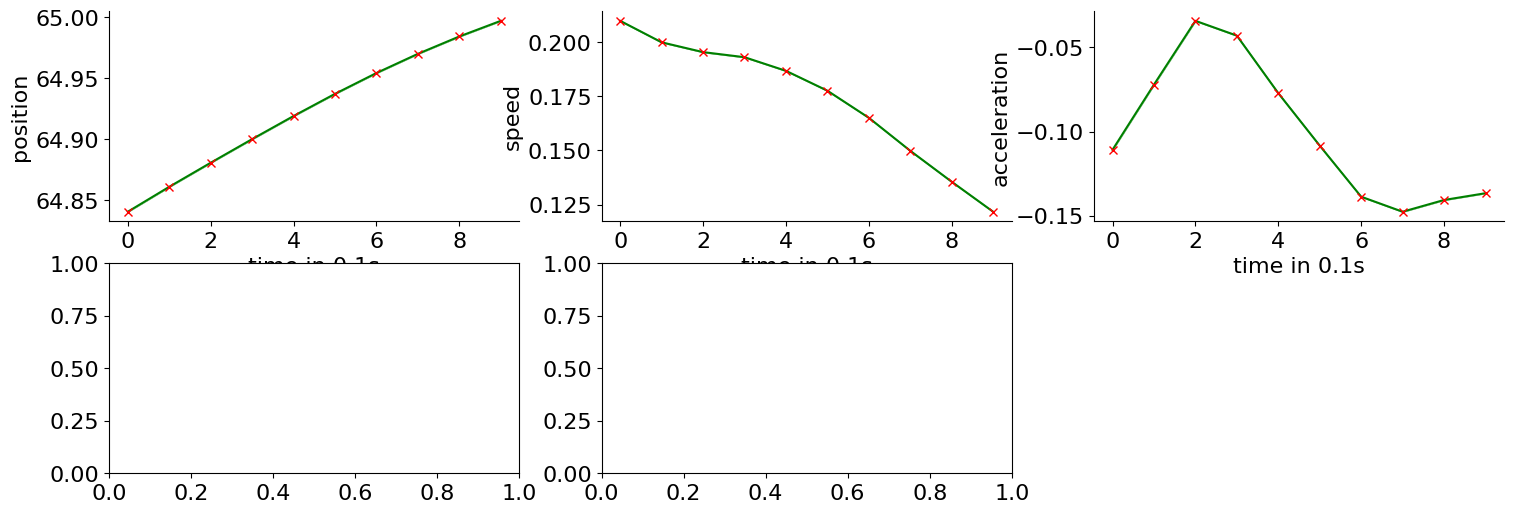

In [ ]:
visualize_trajectory(dataind=9) # change to visualize a different sample

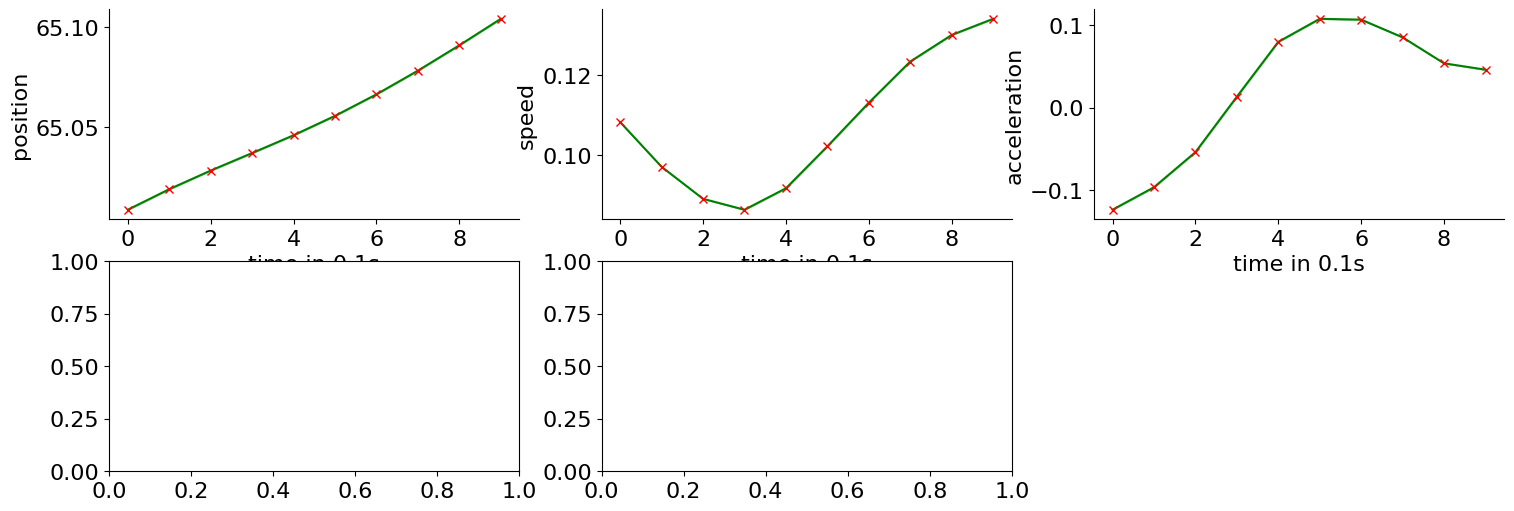

In [ ]:
visualize_trajectory(dataind=10) # change to visualize a different sample